## Example detector optimiziation using DarkOpt

Caleb Fink

In [1]:
import numpy as np
import darkopt as dark # can import either entire package
from darkopt import materials, optimize # or import submodules seperately 
import darkopt.plotting as plot

The code structure follows that of a detector. A `Detector` object is composed of an `Absorber` object and a `QET` object. A `QET` is composed of at `TES` object. `Absorber`, `QET`, and `TES` objects have material properties that are passed from `darkopt.materials`. 

A `Detector` object can be created by making all these objects, or can be made in one step using `darkobp.create_detector()`, as shown below

In [2]:
# Set some initial parameters
l = 145e-6 
w = 2.5e-06
l_overlap = 20e-6
n_fins = 6
sigma = 220000000.0
t0 = 40e-3
res_n = 0.23999999999999996
res_n = 1
con_type= 'ellipse'
#con_type= 'modern'
l_f = 150e-6 * 0.9
h_fin = 300e-9
ahole = 4.9e-11

# create absorber 
absorber = dark.Absorber(name="Si", 
                         shape= "square",
                         height= 1e-3, 
                         width=1e-2,  
                         w_safety=3e-3)
# create tes
tes = dark.TES(length=l,
       width=w, 
       l_overlap = l_overlap,
       n_fin=n_fins,
       sigma=sigma,
       rn=res_n,
       rsh = 5e-3,
       rp = 6e-3,   
   L_tot= 5e-08,)

# create qet
qet = dark.QET(l_fin=l_f, 
               h_fin=h_fin, 
               TES=tes, 
               ahole=ahole, 
               type_qp_eff=0)

# create detector
det = dark.Detector(absorber, qet)



All of these classes have printing methods to display values

In [3]:
tes.print()
qet.print()
det.print()

---------------- TES PARAMETERS ----------------
sigma = 220000000.0
wTc =  0.0001212666209673604
Tc =  0.04
rho =  9.599999999999999e-08
t =  4e-08
l =  0.000145
w =  2.5e-06
foverlap =  0.9086294416243654
res1tes =  139.19999999999996
n_fin =  6
vol1TES =  1.45e-17
vol1 =  1.1050823125000004e-16
Zeta = 0.11599236190296865
Max TES length before phase sep = 0.00024061867773147636 [m]
Is TES phase seperated = False
nTES =  140
tot_volume =  1.5471152375000007e-14
K =  3.4036535225000017e-06 
volFinCon =  4.8599999999999996e-18
WAlOverlap =  2.0384762500000008e-16
veff_WFinCon =  0.88
veff_WAloverlap =  0.45
Rn =  1
R0 =  0.45
fOp =  0.45
P0 =  3.476639865972058e-13
L =  5e-08
tau_el = 1.0845986984815617e-07
tau_etf = 5.329154500534982e-05
tau_0 = 0.003731244819599223
tau_+ = 1.0890871060375646e-07
tau_- = 5.307191686730087e-05
------------------------------------------------

---------------- QET PARAMETERS ----------------
ePQP =  0.52
eQPabsb = 0.5347309714934448
lfin =  0.000135
hfin

The noise can be plotted as well as the energy resolution calulated

Expected Energy Resolusion is: 313.8 [meV]


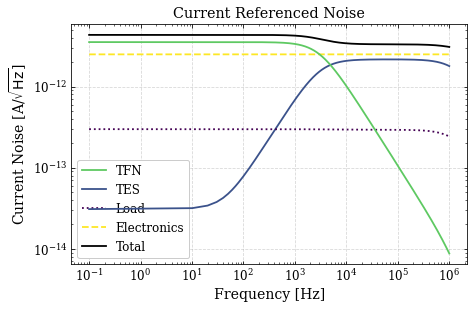

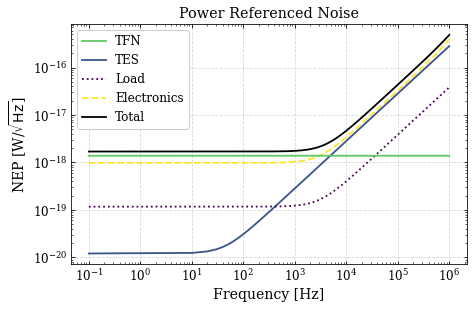

In [4]:
det.plot_si()
det.plot_sp()
print(f'Expected Energy Resolusion is: {det.calc_res()*1e3:.1f} [meV]')

The detector responsivity can also be plotted


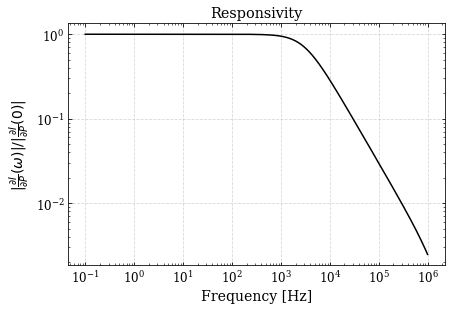

In [5]:
det.plot_responsivity()

## Optimization

Also, the optimum QET/TES parameters can be found by minimizing the energy resolution using `darkopt.optimize.optimize_detector()`. There is the option to enforce a desired total Al surface area covered by passing a value to the parameter `per_Al`. By default this is set to `None` and the Al coverage will be allowed to float free in the optimization

In [6]:
desired_coverage = 0.01

det_opt, eres, params = optimize.optimize_detector(tes_length0=l,
    tes_l_overlap0=l_overlap,
    n_fin0=n_fins,
    l_fin0=l_f,
    h_fin0=h_fin,
    per_Al = desired_coverage,                               
    tes_width=w,
    abs_type="Si", 
    abs_shape="square", 
    abs_height=1e-3, 
    abs_width=1e-2, 
    w_safety=3e-3,
    sigma=sigma,
    rn=res_n,
    rp=6e-3,
    L_tot=5e-08,
    ahole=ahole, 
    con_type='ellipse')


resolution: 252.0 [meV]
TES Length = 141.4 [μm]
Overlap Legth = 14.1 [μm]
Fin Length = 132.6 [μm]
Fin Height = 0.6 [μm]
N Fins = 6
Total Al surface coverage = 1.000 [%]
Absolute phonon collection energy efficiency = 21.84 [%]
Number of TESs = 28
Close Packed: False
---------------------------------
Phase margin = 99.4 [%] (phase_sep_legth - tes_legnth)/tes_legnth)


## Visualization

The energy resolution, total phonon efficiency, phonon collection time constant, and electrothermal feedback time constants can all be plotted as 2D plots of any combination of the optimization parameters, additionally these can be plotted as functions of Tc as well. An initialized `Detector` object is passed to the plotting along with arrays of values to plot against. The values of the fixed parameters are taken from the `Detector` object.

(<Figure size 486x320.76 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fab0e0c0790>)

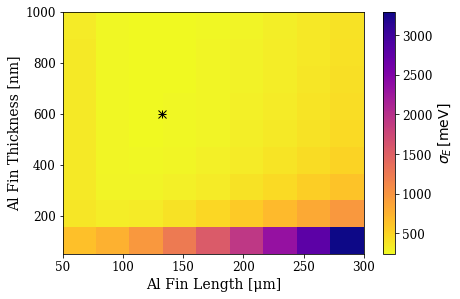

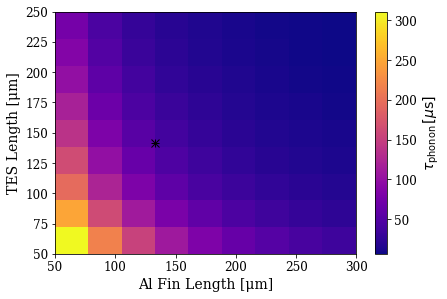

In [7]:
n = 10

l = np.linspace(50e-6, 250e-6, n)
l_f = np.linspace(50e-6, 300e-6, n)
l_overlap = np.linspace(1e-6, 50e-6, n)
h_f = np.linspace(50e-9, 1000e-9, n)
plot.plot_hfin_vs_lfin(h_f, l_f, det_opt, val='energy')
plot.plot_ltes_vs_lfin(l, l_f, det_opt, val='tau_ph')

(<Figure size 486x320.76 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fab0e13d430>)

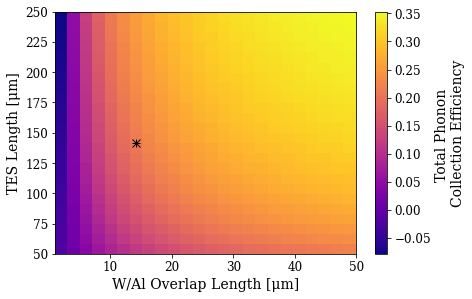

In [8]:
n = 25

l = np.linspace(50e-6, 250e-6, n)
l_overlap = np.linspace(1e-6, 50e-6, n)


plot.plot_ltes_vs_loverlap(l, l_overlap, det_opt, val='eff')

(<Figure size 486x320.76 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fab00fa05e0>)

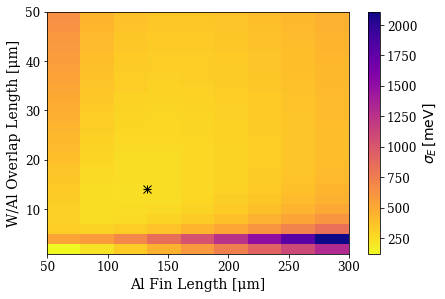

In [9]:
plot.plot_loverlap_vs_lfin(l_overlap, l_f, det_opt, val='energy')

In [10]:
tc = np.linspace(20e-3, 70e-3, n)

plot.plot_ltes_vs_tc(l, tc, det, val='tau_etf')


NameError: name 'materials' is not defined